# **Task 3 : Exploratory Data Analysis - Retail (Level - Beginner)**



In this task, we will be performing exploratory data analysis on the dataset "Retail" and try to find out which state and city has more profit. Also, we will find the region of maximum sale and various insights.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data
3. Visualizing the data
4. Data Analysis
5. Conclusion


**1. Loading the data**

The dataset is borrowed from https://bit.ly/3i4rbWl . The overview of this dataset is, it has 9994 samples with 13 features. Download the dataset from the link provided.

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#Loading data into dataframe

data = pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


**2. Familiarizing with Data:**

In this step, few dataframe methods are used to look into the data and its features.

In [4]:
#Shape of dataframe

data.shape


(9994, 13)

In [5]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
data.infob

<bound method DataFrame.info of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code R

In [7]:
#checking for null value

data.isna().sum()


Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# describtion of dataset

data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [9]:
#unique value in dataset

data.nunique()  

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
#checking for outlier

col=["Postal Code","Sales","Quantity","Discount","Profit"]
new_data=data
for i in col:
    new_data=new_data.sort_values(by=[i])
    q1=new_data[i].quantile(0.25)
    q3=new_data[i].quantile(0.75)
    iqr=q3-q1
    lwo=q1-1.5*iqr
    upo=q3+1.5*iqr
    new_data=new_data[(new_data[i]<upo) & (new_data[i]>lwo)]
    new_data=new_data.sort_index().reset_index(drop=True)

if(new_data.size<data.size):
    print("There exist outlier in dataset.")

There exist outlier in dataset.


**3. Visualizing the data:**

Few plots and graphs are displayed to find how the data is distributed and the how features are related to each other.

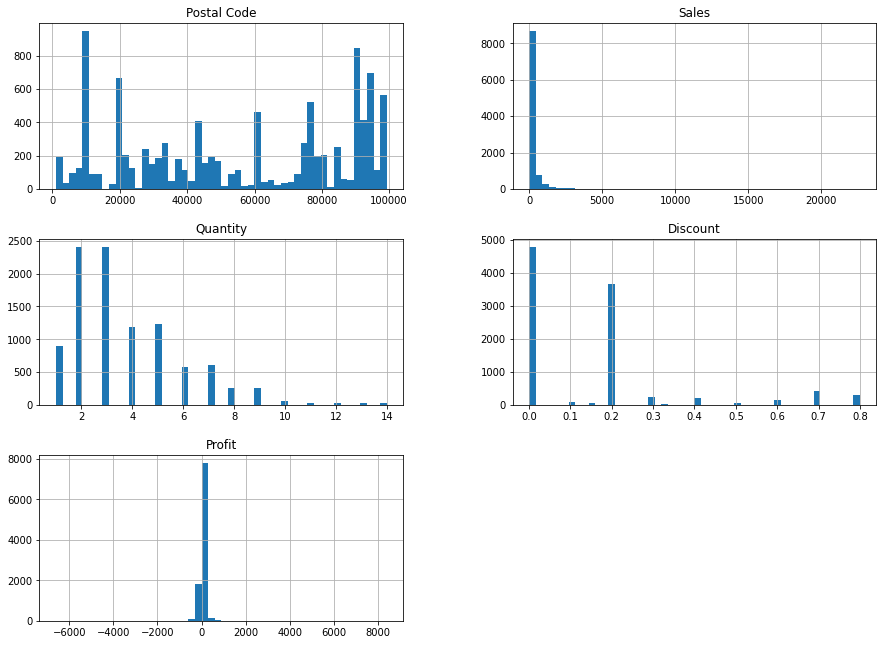

In [11]:
#histogram for Visualizing

data.hist(bins = 50,figsize = (15,11));

In [12]:
#correlation among dataset

data.corr().abs()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,0.023854,0.012761,0.058443,0.029961
Sales,0.023854,1.000000,0.200795,0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,0.028190,0.008623,1.000000,0.219487
Profit,0.029961,0.479064,0.066253,0.219487,1.000000


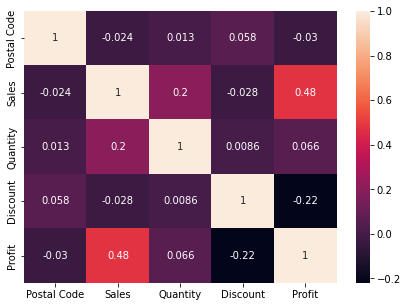

In [13]:
#Correlation heatmap

plt.figure(figsize=(7,5))
sns.heatmap(data.corr(), annot=True)
plt.show()

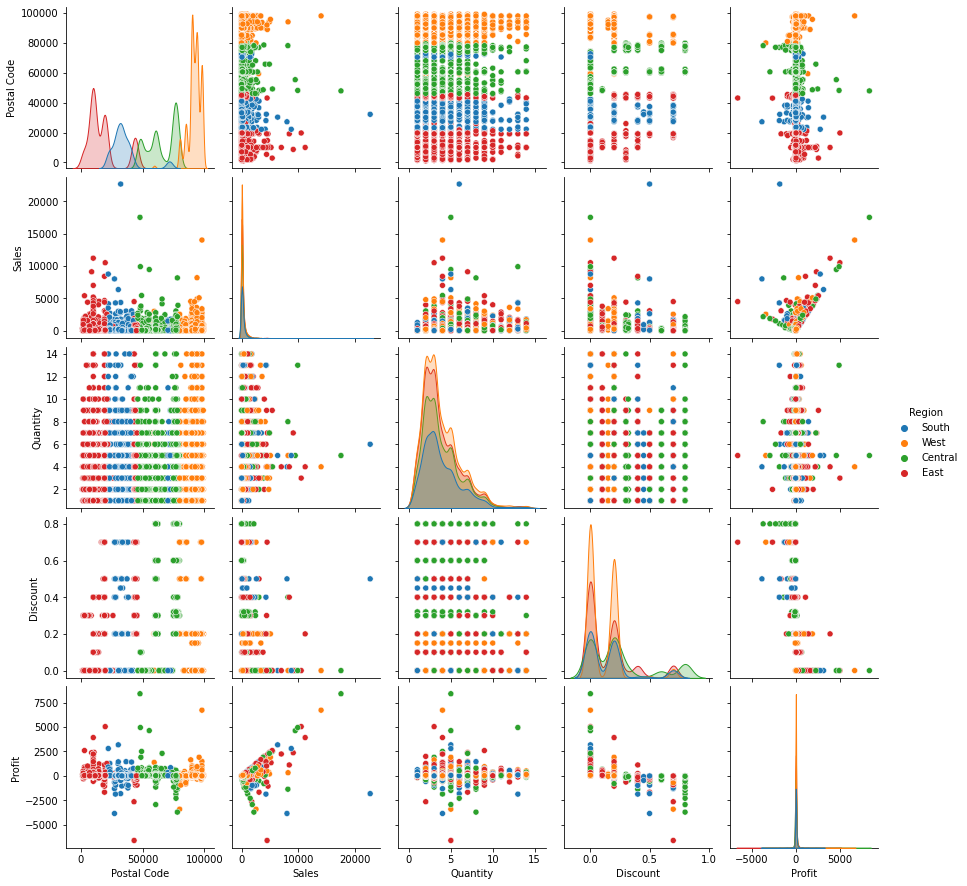

In [14]:
sns.pairplot(data,hue='Region');

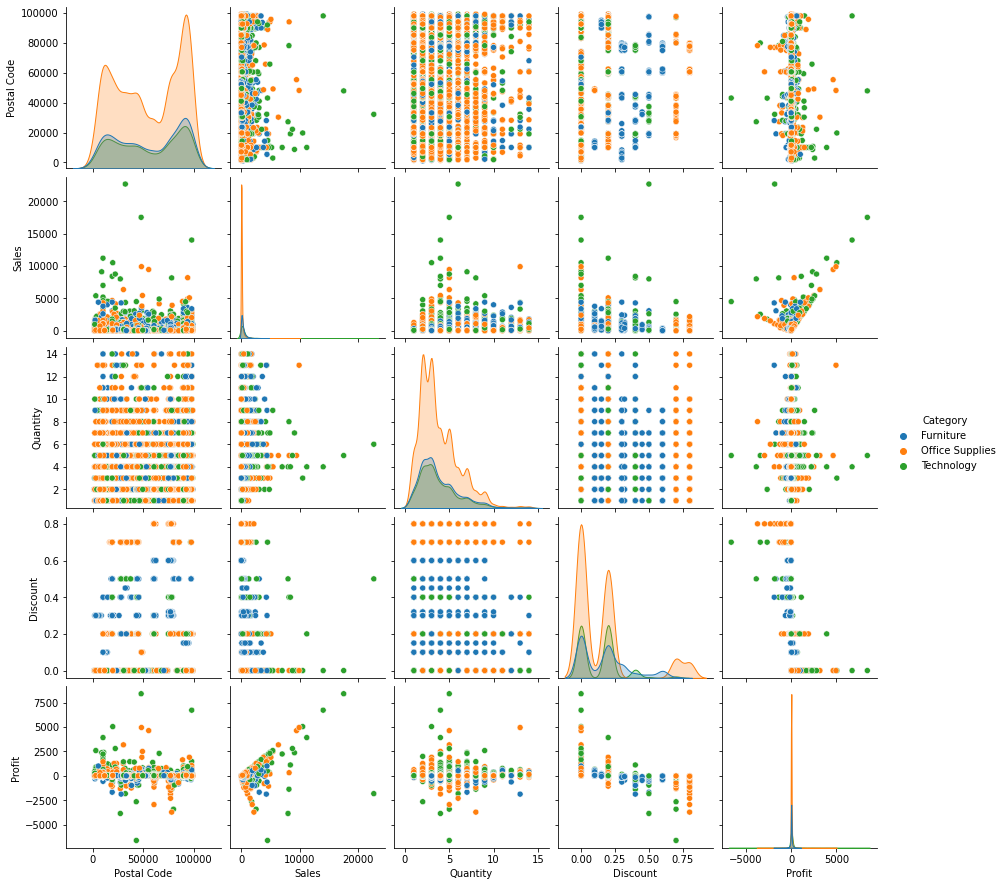

In [15]:
sns.pairplot(data,hue='Category');

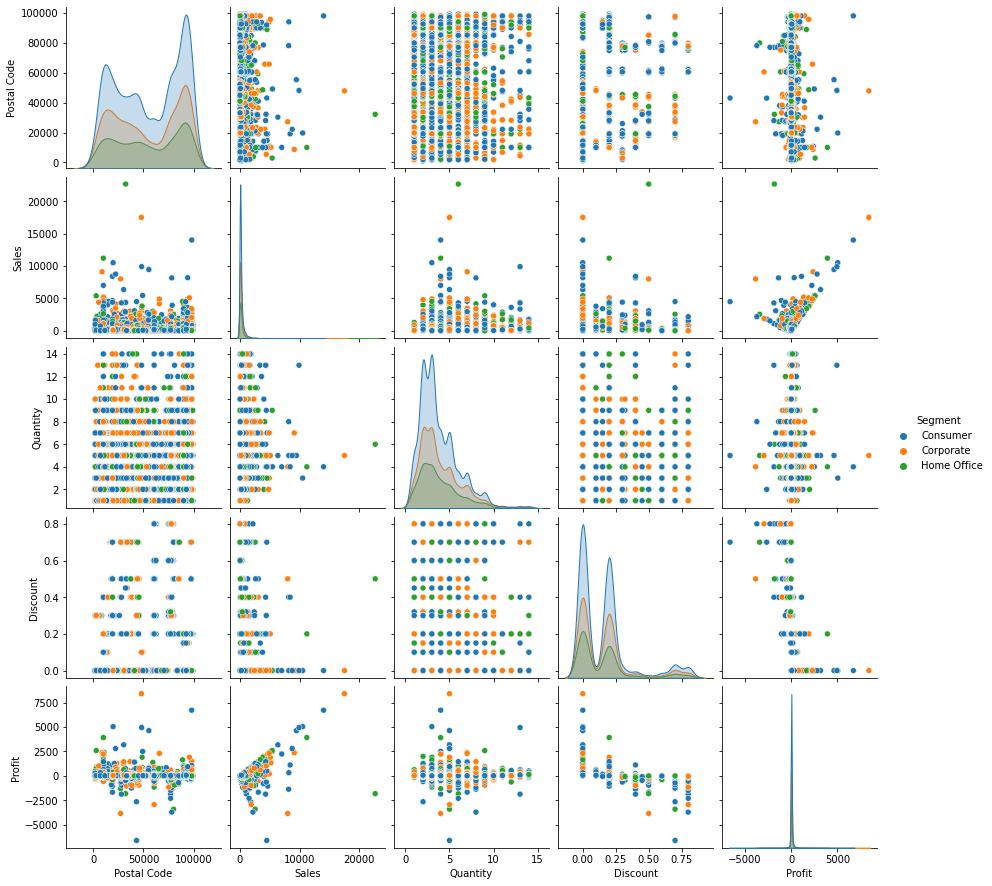

In [16]:
sns.pairplot(data,hue='Segment');

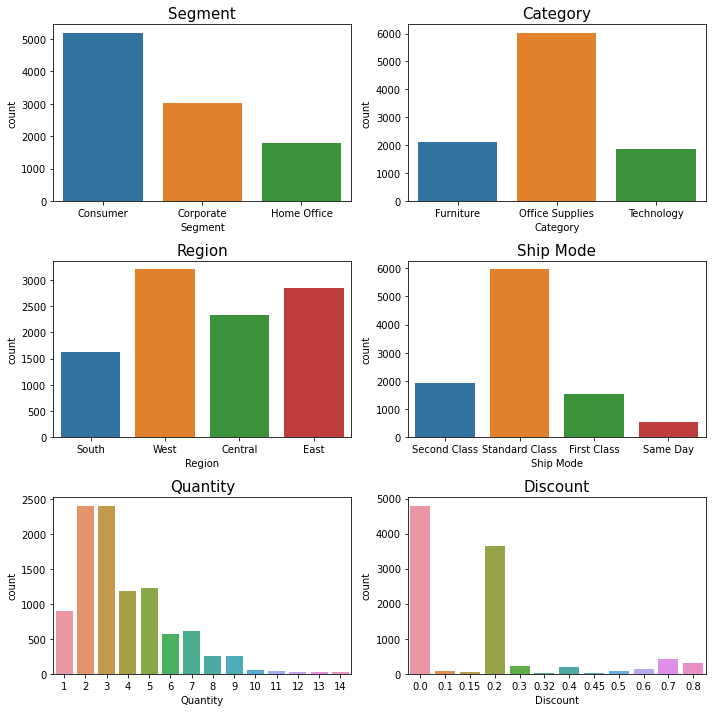

In [17]:
#plotting count plot for various feature

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,10));
sns.countplot(x='Segment',data=data,ax=axs[0][0])
sns.countplot(x='Category',data=data,ax=axs[0][1])
sns.countplot(x='Region',data=data,ax=axs[1][0])
sns.countplot(x='Ship Mode',data=data,ax=axs[1][1])
sns.countplot(x='Quantity',data=data,ax=axs[2][0])
sns.countplot(x='Discount',data=data,ax=axs[2][1])


axs[0][0].set_title('Segment',fontsize=15)
axs[0][1].set_title('Category',fontsize=15)
axs[1][0].set_title('Region',fontsize=15)
axs[1][1].set_title('Ship Mode',fontsize=15)
axs[2][0].set_title('Quantity',fontsize=15)
axs[2][1].set_title('Discount',fontsize=15)

plt.tight_layout()

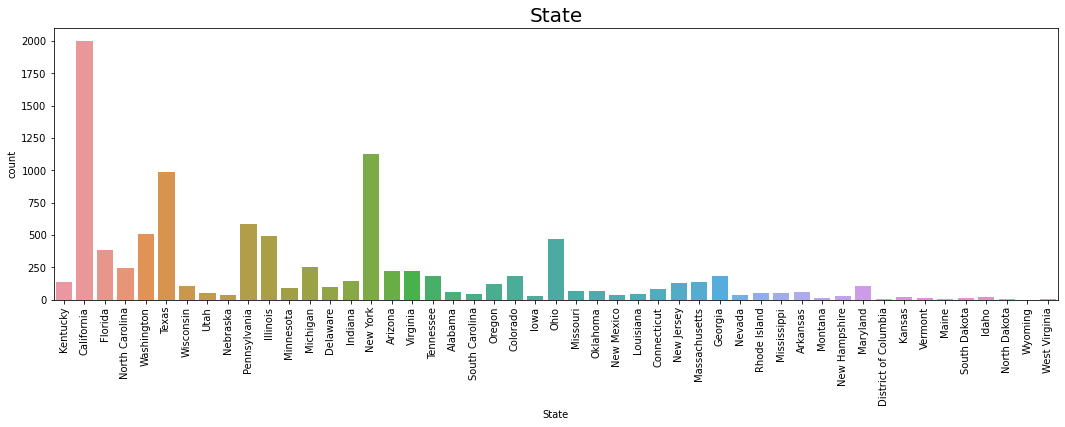

In [18]:
plt.figure(figsize=(18,5))
sns.countplot(x='State',data=data)
plt.xticks(rotation=90)
plt.title('State',fontsize=20)
plt.show()

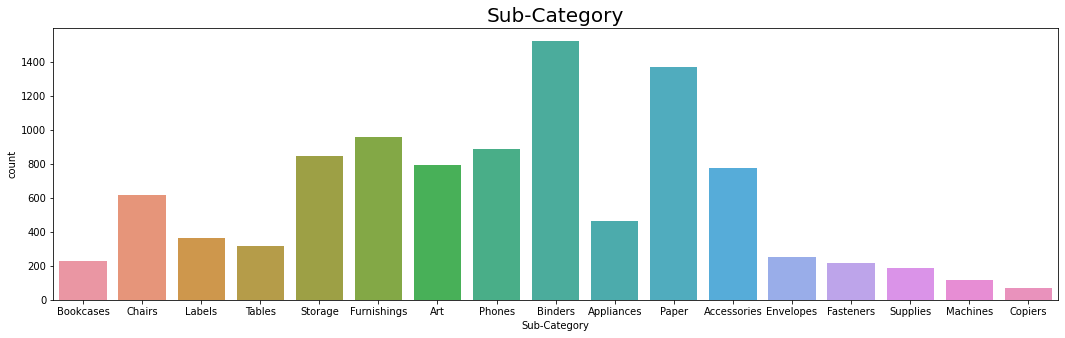

In [19]:
plt.figure(figsize=(18,5))
sns.countplot(x='Sub-Category',data=data)
plt.title('Sub-Category',fontsize=20)
plt.show()

**4. Data Analysis:**


**4.1. Statewise analysis:**

In [20]:
dt1 = data['State'].value_counts()
dt1

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

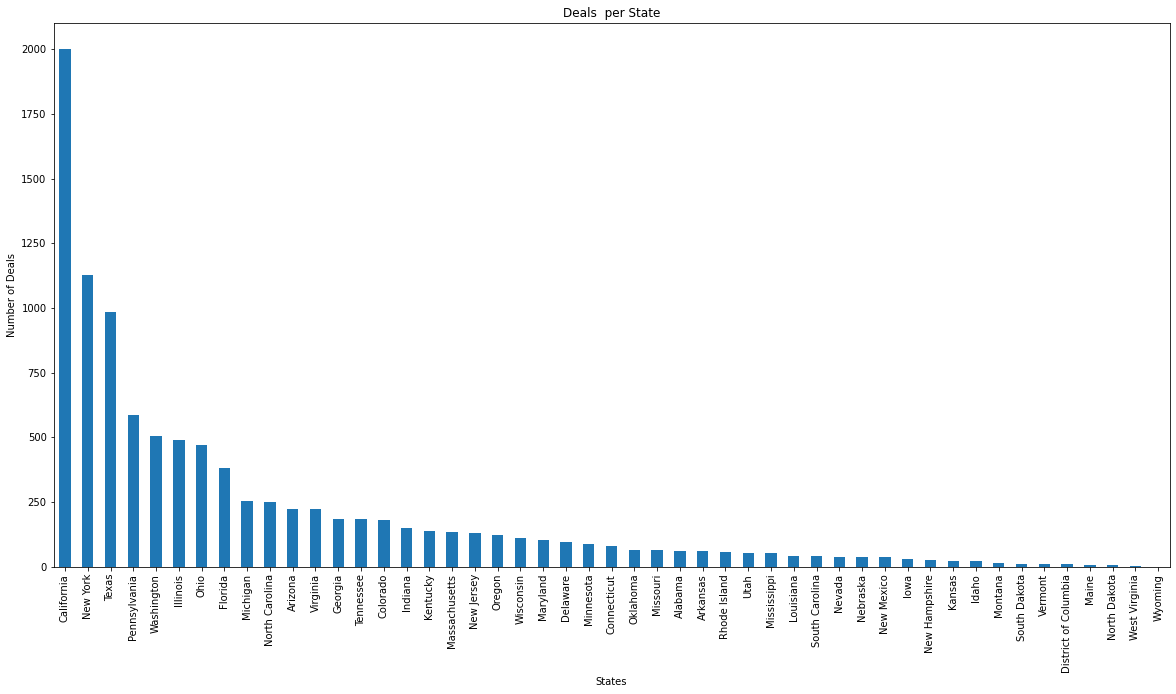

In [21]:
dt1.plot(kind='bar', figsize=(20, 10))
plt.xlabel('States')
plt.ylabel('Number of Deals')
plt.title('Deals  per State')
plt.show()

In [22]:
print("The average number of deals per state is {}".format(round(dt1.mean())))

The average number of deals per state is 204


In [23]:
data_state = data.groupby(['State'])[['Sales','Discount','Profit']].mean()
data_state

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


In [24]:
data_state.describe()

,Sales,Discount,Profit
count,49.000000,49.000000,49.000000
mean,276.436899,0.083196,54.047842
std,223.497021,0.127145,51.200953
min,109.630000,0.000000,-36.186304
25%,172.779742,0.000000,32.902358
50%,225.766886,0.007059,56.810775
75%,298.233182,0.075000,85.045279
max,1603.136000,0.390041,204.088936


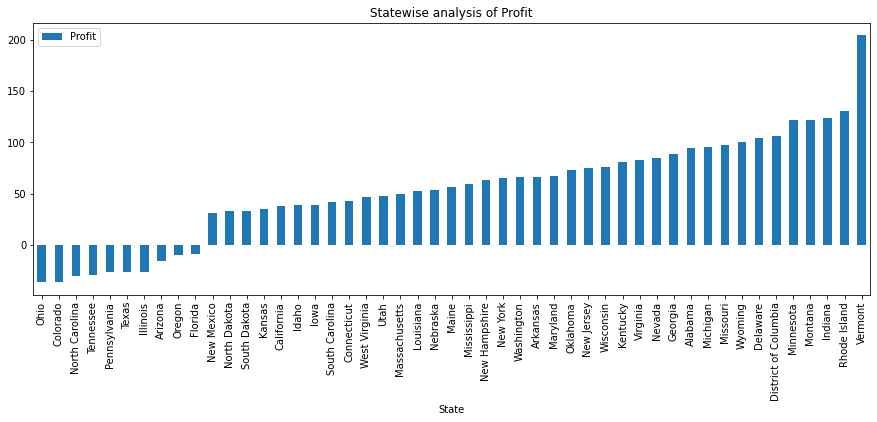

In [25]:
dt_s1 = data_state.sort_values('Profit')
dt_s1[['Profit']].plot(kind='bar',figsize=(15,5))
plt.title('Statewise analysis of Profit');

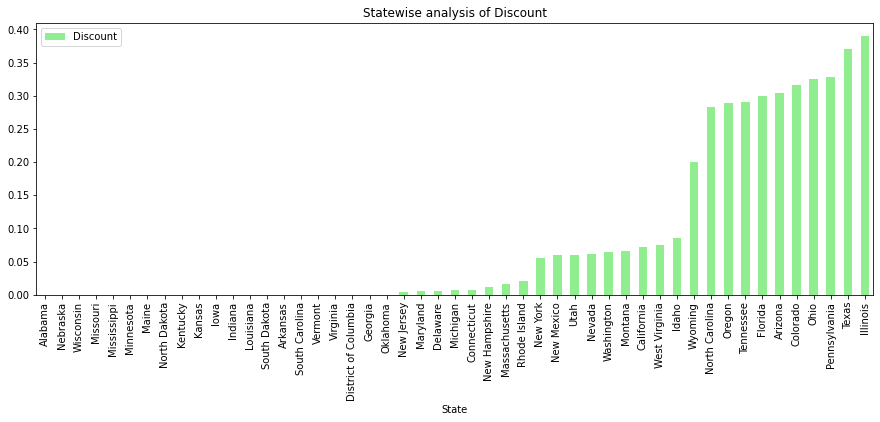

In [26]:
dt_s1 = data_state.sort_values('Discount')
dt_s1[['Discount']].plot(kind='bar',figsize=(15,5),color="lightgreen")
plt.title('Statewise analysis of Discount');

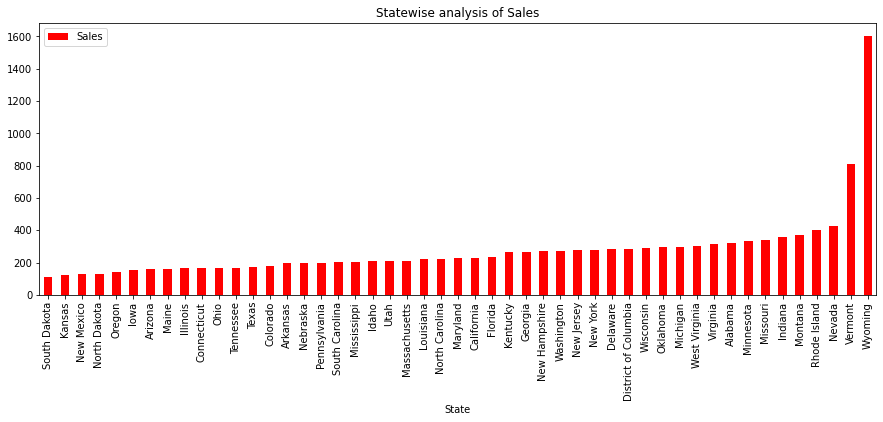

In [27]:
dt_s1 = data_state.sort_values('Sales')
dt_s1[['Sales']].plot(kind='bar',figsize=(15,5),color="red")
plt.title('Statewise analysis of Sales');

**4.2. Citywise analysis:**

In [28]:
dt2 = data['City'].value_counts()
dt2.head(30)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Dallas           157
Jacksonville     125
Detroit          115
Newark            95
Richmond          90
Jackson           82
Columbia          81
Aurora            68
Phoenix           63
Long Beach        61
Arlington         60
San Antonio       59
Miami             57
Louisville        57
Rochester         53
Charlotte         52
Henderson         51
Lakewood          49
Lancaster         46
Fairfield         45
Name: City, dtype: int64

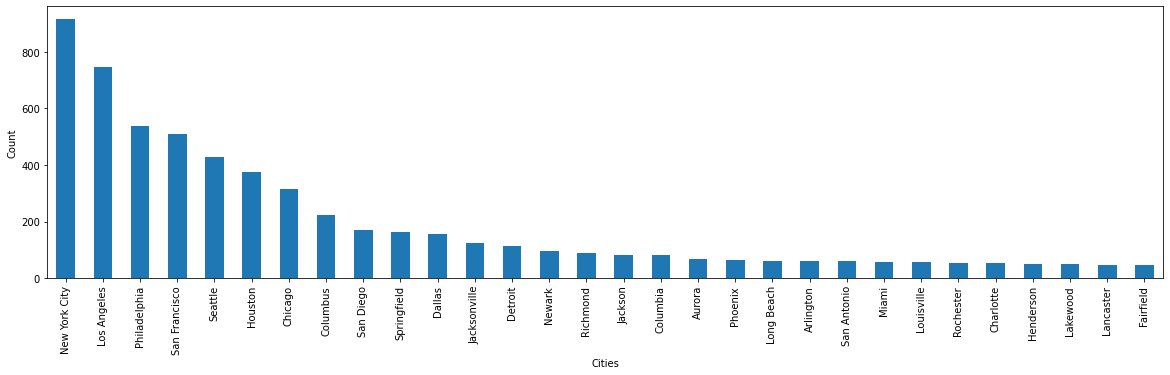

In [29]:
dt2.head(30).plot(kind='bar',figsize=(20,5))
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

In [30]:
print("The average number of deals per City is {}".format(round(dt2.mean())))

The average number of deals per City is 19


In [31]:
data_city = data.groupby(['City'])[['Sales','Discount','Profit']].mean()
data_city = data_city.sort_values('Profit')
data_city

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052
...,...,...,...
Appleton,835.655000,0.000000,277.383150
Minneapolis,733.501739,0.000000,296.721070
Lafayette,807.619355,0.000000,323.173794


In [32]:
data_city.describe()


,Sales,Discount,Profit
count,531.000000,531.000000,531.000000
mean,201.420668,0.147103,28.744612
std,212.469367,0.169456,67.623876
min,1.392000,0.000000,-200.619160
25%,75.170714,0.000000,2.131924
50%,148.347917,0.075000,19.239333
75%,263.897200,0.260000,49.449500
max,2354.395000,0.800000,642.885750


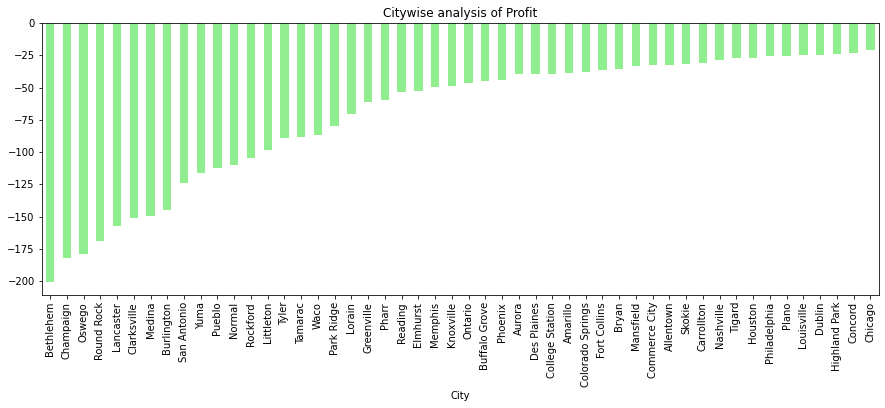

In [33]:
data_city['Profit'].head(50).plot(kind='bar',figsize=(15,5),color='lightgreen')
plt.title('Citywise analysis of Profit');

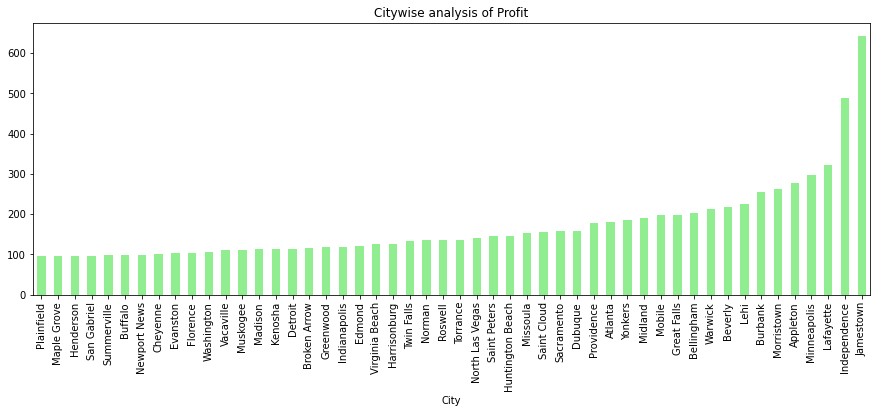

In [34]:
data_city['Profit'].tail(50).plot(kind='bar',figsize=(15,5),color='lightgreen')
plt.title('Citywise analysis of Profit');

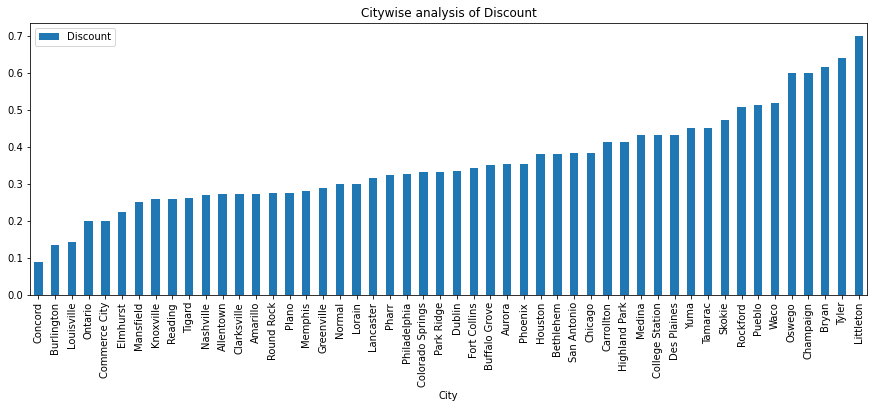

In [35]:
dt_s1 = data_city.head(50).sort_values('Discount')
dt_s1[['Discount']].plot(kind='bar',figsize=(15,5))
plt.title('Citywise analysis of Discount');


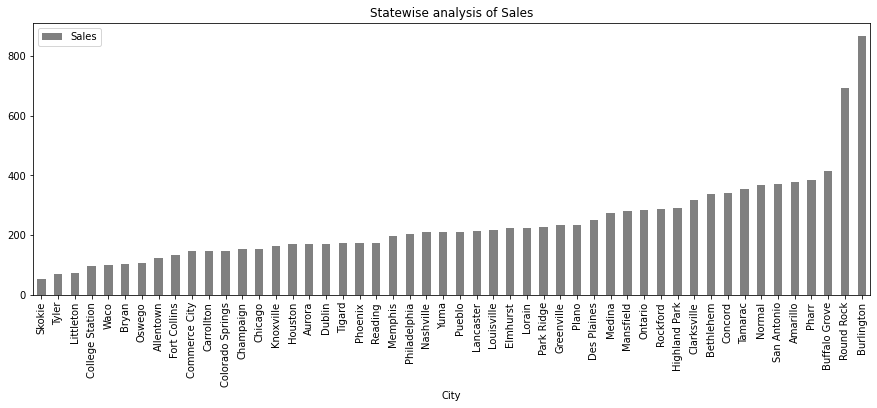

In [36]:
dt_s1 = data_city.head(50).sort_values('Sales')
dt_s1[['Sales']].plot(kind='bar',figsize=(15,5),color='grey')
plt.title('Statewise analysis of Sales');

**4.3. Quantitywise analysis :**


In [37]:
dt3 = data['Quantity'].value_counts().sort_index()
dt3

1      899
2     2402
3     2409
4     1191
5     1230
6      572
7      606
8      257
9      258
10      57
11      34
12      23
13      27
14      29
Name: Quantity, dtype: int64

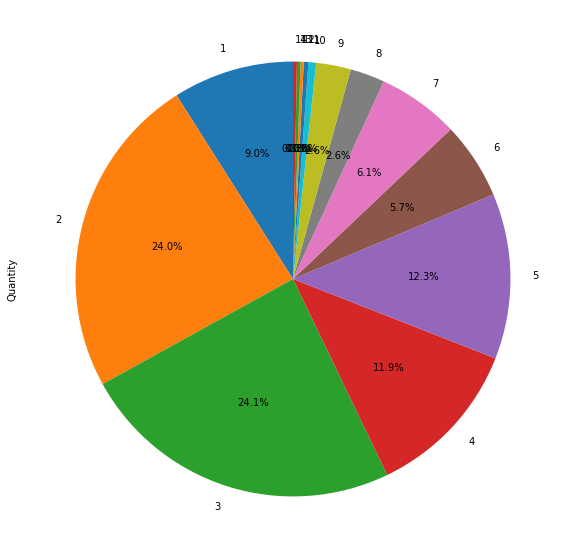

In [38]:
dt3.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(10,10),startangle=90)
plt.show()

In [39]:
data_qnt = data.groupby(['Quantity'])[['Sales','Discount','Profit']].mean()
data_qnt

,Sales,Discount,Profit
Quantity,,,
1,59.234632,0.152959,8.276396
2,120.354488,0.154858,16.006831
3,175.201578,0.153329,23.667715
4,271.764059,0.157708,37.131310
5,337.936339,0.157146,40.257394
6,362.101960,0.166556,18.051517
7,395.888393,0.161980,56.579163
8,458.210802,0.171595,42.244342
9,498.083683,0.147946,68.557716


In [40]:
data_qnt.describe()

,Sales,Discount,Profit
count,14.000000,14.000000,14.000000
mean,418.693469,0.152430,60.965039
std,274.445427,0.022942,59.397074
min,59.234632,0.097059,8.276396
25%,288.307129,0.152033,26.716387
50%,408.967565,0.156002,41.250868
75%,462.475097,0.160912,65.563078
max,1197.710704,0.190702,235.144481


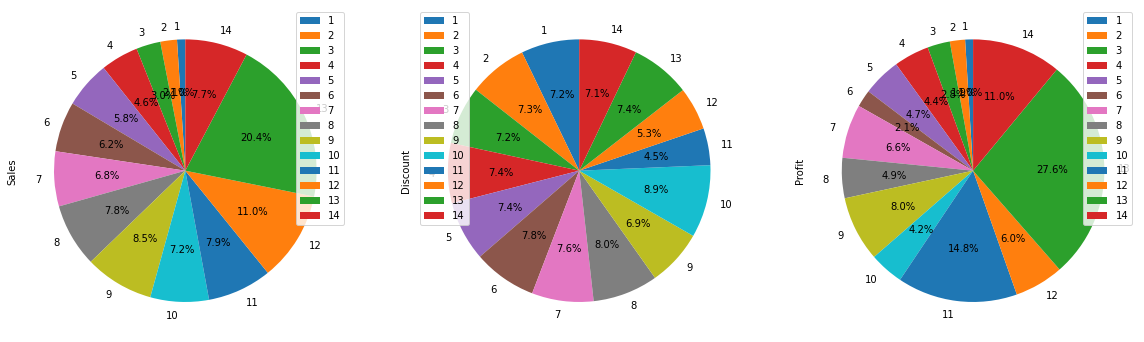

In [41]:
data_qnt.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(20,20),startangle=90)
plt.show()

 **4.4. Regionwise analysis:**

In [42]:
dt4 = data['Region'].value_counts().sort_index()
dt4

Central    2323
East       2848
South      1620
West       3203
Name: Region, dtype: int64

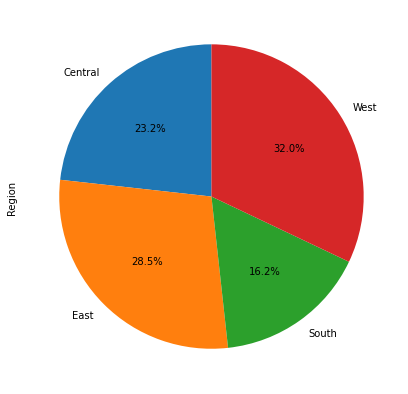

In [43]:
dt4.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(7,7),startangle=90)
plt.show()

In [44]:
data_reg = data.groupby(['Region'])[['Sales','Discount','Profit']].mean()
data_reg

,Sales,Discount,Profit
Region,,,
Central,215.772661,0.240353,17.092709
East,238.336110,0.145365,32.135808
South,241.803645,0.147253,28.857673
West,226.493233,0.109335,33.849032


In [45]:
data_reg.describe()

,Sales,Discount,Profit
count,4.000000,4.000000,4.000000
mean,230.601412,0.160577,27.983805
std,11.861486,0.055973,7.550268
min,215.772661,0.109335,17.092709
25%,223.813090,0.136358,25.916432
50%,232.414671,0.146309,30.496740
75%,239.202993,0.170528,32.564114
max,241.803645,0.240353,33.849032


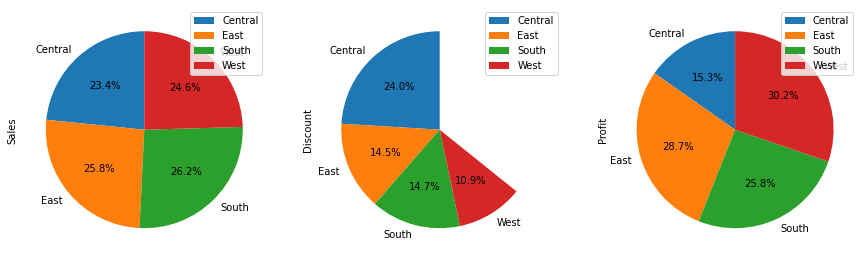

In [46]:
data_reg.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(15,20),startangle=90)
plt.show()

**4.5. shipmentmodewise analysis:**

In [47]:
dt5 = data['Ship Mode'].value_counts().sort_index()
dt5

First Class       1538
Same Day           543
Second Class      1945
Standard Class    5968
Name: Ship Mode, dtype: int64

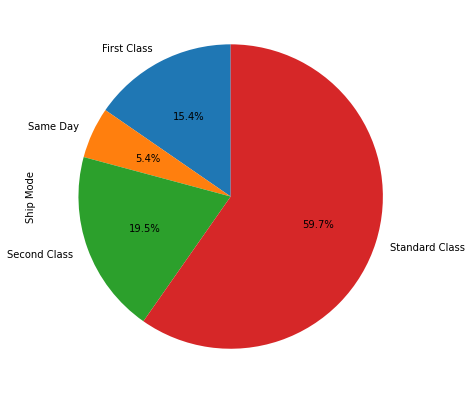

In [48]:
dt5.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(7,7),startangle=90)
plt.show()

In [49]:
data_ship = data.groupby(['Ship Mode'])[['Sales','Discount','Profit']].mean()
data_ship

,Sales,Discount,Profit
Ship Mode,,,
First Class,228.497024,0.164610,31.839948
Same Day,236.396179,0.152394,29.266591
Second Class,236.089239,0.138895,29.535545
Standard Class,227.583067,0.160023,27.494770


In [50]:
data_ship.describe()

,Sales,Discount,Profit
count,4.000000,4.000000,4.000000
mean,232.141377,0.153981,29.534214
std,4.752138,0.011249,1.783944
min,227.583067,0.138895,27.494770
25%,228.268535,0.149019,28.823636
50%,232.293131,0.156209,29.401068
75%,236.165974,0.161170,30.111646
max,236.396179,0.164610,31.839948


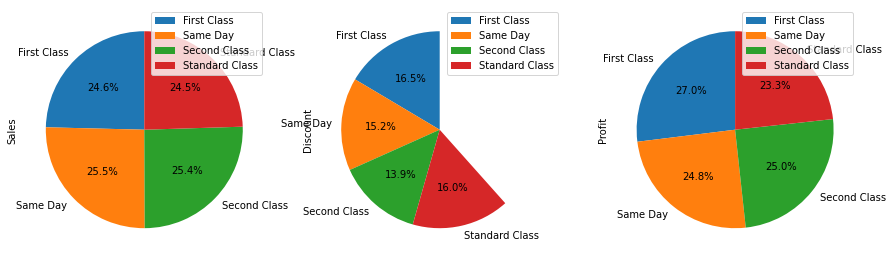

In [51]:
data_ship.plot.pie(subplots=True,figsize=(15,20), autopct='%1.1f%%',startangle=90)
plt.show()

**4.6. Categorywise analysis:**

In [52]:
dt6 = data['Category'].value_counts().sort_values()
dt6

Technology         1847
Furniture          2121
Office Supplies    6026
Name: Category, dtype: int64

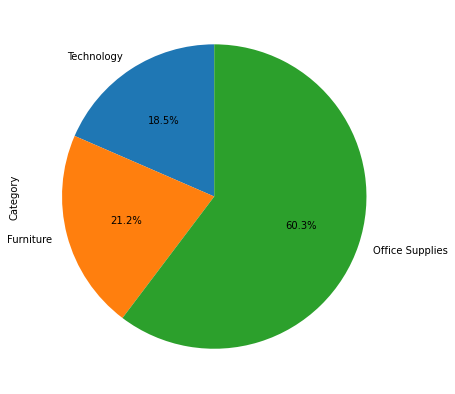

In [53]:
dt6.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(7,7),startangle=90)
plt.show()

In [54]:
data_cat = data.groupby(['Category'])[['Sales','Discount','Profit']].mean()
data_cat

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


In [55]:
data_cat.describe()

,Sales,Discount,Profit
count,3.000000,3.000000,3.000000
mean,307.289421,0.154510,35.926126
std,170.716157,0.020938,37.541214
min,119.324101,0.132323,8.699327
25%,234.579494,0.144804,14.513188
50%,349.834887,0.157285,20.327050
75%,401.272082,0.165604,49.539526
max,452.709276,0.173923,78.752002


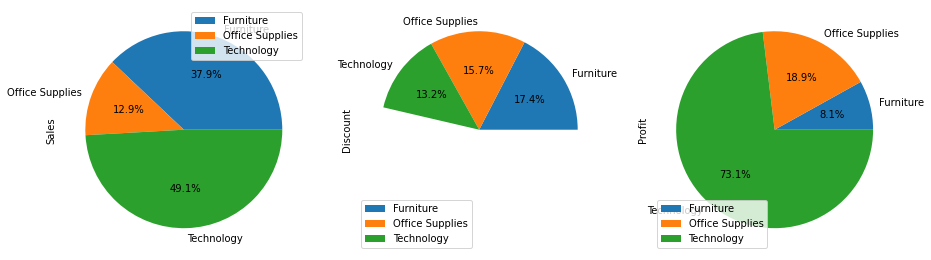

In [56]:
data_cat.plot.pie(subplots=True,figsize=(15,20), autopct='%1.1f%%')
plt.show()

**4.7. subcategorywise analysis:**

In [57]:
dt7 = data['Sub-Category'].value_counts().sort_values()
dt7

Copiers          68
Machines        115
Supplies        190
Fasteners       217
Bookcases       228
Envelopes       254
Tables          319
Labels          364
Appliances      466
Chairs          617
Accessories     775
Art             796
Storage         846
Phones          889
Furnishings     957
Paper          1370
Binders        1523
Name: Sub-Category, dtype: int64

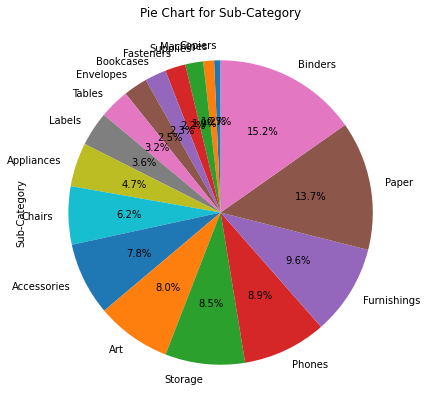

In [58]:
dt7.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(7,7),startangle=90)
plt.title("Pie Chart for Sub-Category")
plt.show()

In [59]:
data_subcat = data.groupby(['Sub-Category'])[['Sales','Discount','Profit']].mean()
data_subcat

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


In [60]:
data_subcat.describe()

,Sales,Discount,Profit
count,17.000000,17.000000,17.000000
mean,428.912416,0.150174,64.424783
std,600.990984,0.091648,195.951129
min,13.936774,0.068681,-55.565771
25%,64.867724,0.076842,8.200737
50%,230.755710,0.138349,24.856620
75%,503.859633,0.170178,38.922758
max,2198.941618,0.372292,817.909190


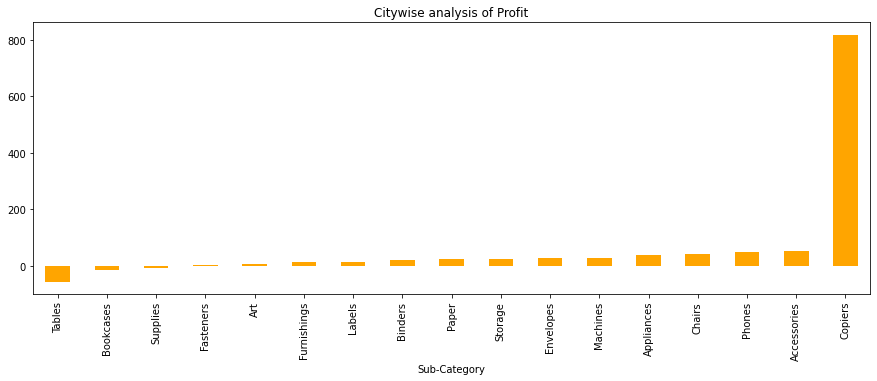

In [61]:
dt_s1 = data_subcat.sort_values('Profit')
dt_s1['Profit'].plot(kind='bar',figsize=(15,5),color='orange')
plt.title('Citywise analysis of Profit');

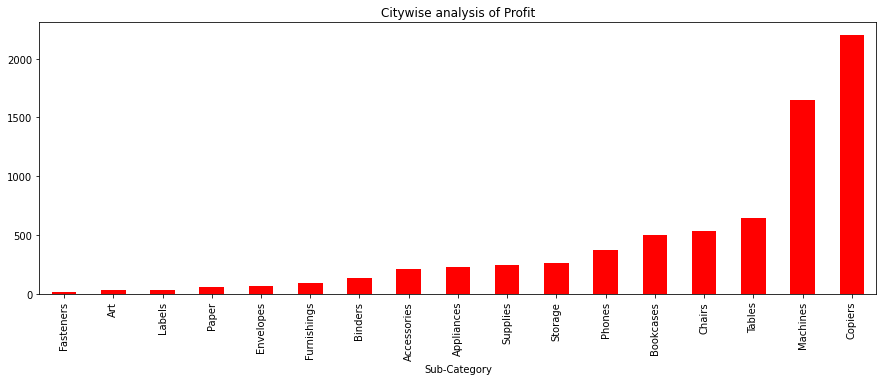

In [62]:
dt_s1 = data_subcat.sort_values('Sales')
dt_s1['Sales'].plot(kind='bar',figsize=(15,5),color='red')
plt.title('Citywise analysis of Profit');

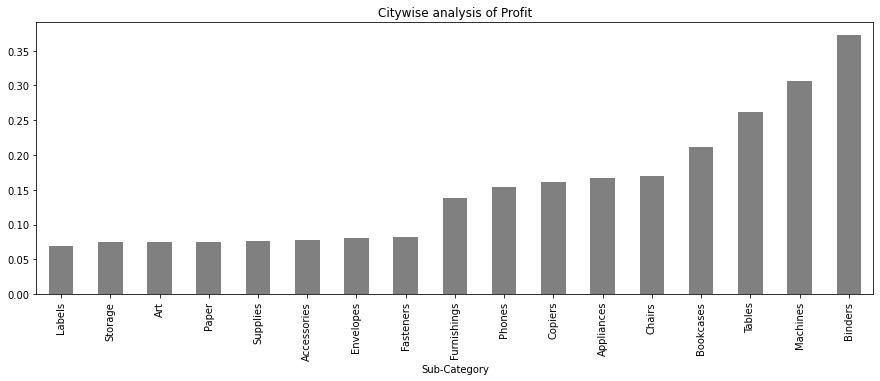

In [63]:
dt_s1 = data_subcat.sort_values('Discount')
dt_s1['Discount'].plot(kind='bar',figsize=(15,5),color='grey')
plt.title('Citywise analysis of Profit');

**5. Conclusion:**

1. Dataset has 9994 samples with 13 features.
2. There is no null value in dataset.
3. There exist outlier in dataset.
4. Almost 50% state does not provide discount
5. There are some state which are in loss
6. Jamestown has highest profit among all cities
7. Concord gives minimum discount where as littleton gives maximum discount
8. Almost 50% of data is belows to 2 and 3 Quality
9. Cental region provides maximum sales
10. Standard class has more than 50% count in dataset
11. 50% of the data is from office supplies category
12. Sub-category copies has more profit
13. California has more count in dataset.
14. The average number of deals per state is 204.